In [65]:
#import lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [66]:
# Change the csv filepath with your own path
netflix_titles_df = pd.read_csv('C:/Users/ADMIN/Netflix-Movies-and-TV-shows/Data/netflix_titles.csv')
netflix_titles_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [67]:
netflix_titles_df.info()
netflix_titles_df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [68]:
netflix_titles_df['director'].isna().sum()

2634

In [70]:
netflix_titles_df.isnull().values.any()
netflix_titles_df.isnull().sum().sum()
#double sum the null of all values

4307

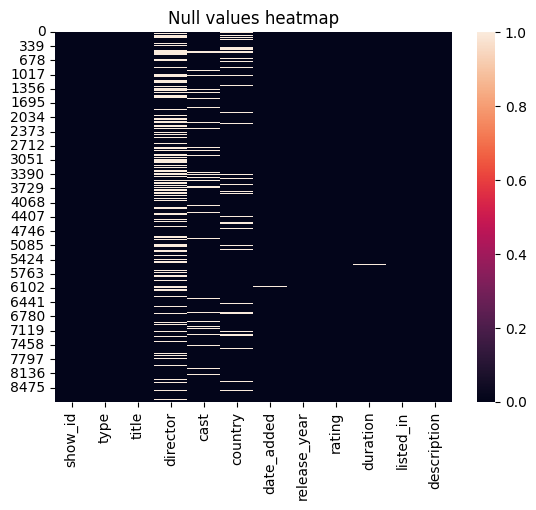

In [71]:
sns.heatmap(netflix_titles_df.isnull(), cbar= True)
plt.title("Null values heatmap")
plt.show()

In [72]:
netflix_titles_df['director'].fillna('No Director', inplace=True)
netflix_titles_df['cast'].fillna('No Cast', inplace=True)
netflix_titles_df['country'].fillna('Country Unavailable', inplace=True)
#netflix_titles_df['date_added'].fillna('Date Unavailable', inplace=True)
netflix_titles_df.dropna(subset = ['date_added','rating'], inplace=True)
netflix_titles_df['duration'].fillna('0 min', inplace=True)
#netflix_titles_df['rating'].fillna('Rating Unavailable', inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3880\4050782046.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix_titles_df['director'].fillna('No Director', inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3880\4050782046.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [73]:
netflix_titles_df.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

In [74]:
netflix_movies_df = netflix_titles_df[netflix_titles_df['type'] == 'Movie'].copy()
netflix_movies_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Country Unavailable,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [75]:
netflix_shows_df = netflix_titles_df[netflix_titles_df['type'] == 'TV Show'].copy()
netflix_shows_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [76]:
netflix_movies_df.duration = netflix_movies_df.duration.astype(str).str.replace(' min', '').astype(int)
netflix_shows_df.rename(columns={'duration': 'seasons'}, inplace=True)
netflix_shows_df.replace({'seasons': {'1 Season': '1 Seasons'}}, inplace=True)
netflix_shows_df.seasons = netflix_shows_df.seasons.astype(str).str.replace(' Seasons', '').astype(int)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3880\2479379649.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(netflix_titles_df['type'], palette="pastel")


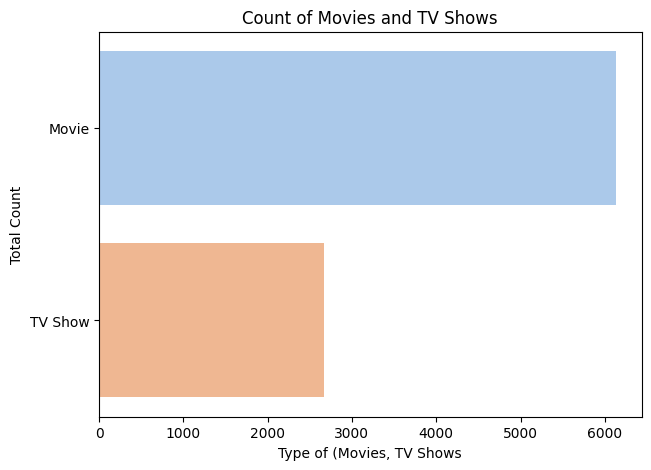

In [77]:
plt.figure(figsize=(7,5))
g = sns.countplot(netflix_titles_df['type'], palette="pastel")
plt.title("Count of Movies and TV Shows")
plt.xlabel("Type of (Movies, TV Shows")
plt.ylabel("Total Count")
plt.show()

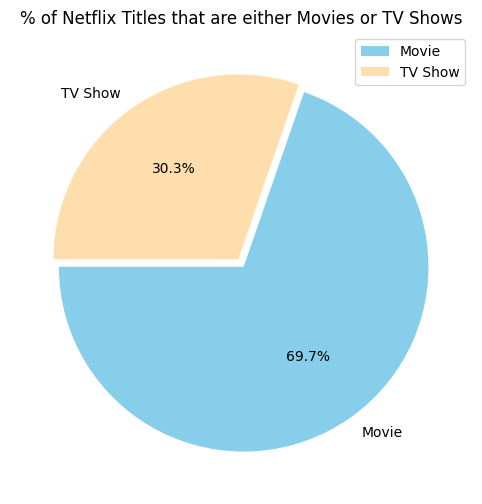

In [78]:
plt.figure(figsize=(12,6))
plt.title("% of Netflix Titles that are either Movies or TV Shows")
g = plt.pie(netflix_titles_df['type'].value_counts(), explode=(0.025,0.025), labels=netflix_titles_df['type'].value_counts().index, colors=['skyblue','navajowhite'],autopct='%1.1f%%', startangle=180)
plt.legend()
plt.show()

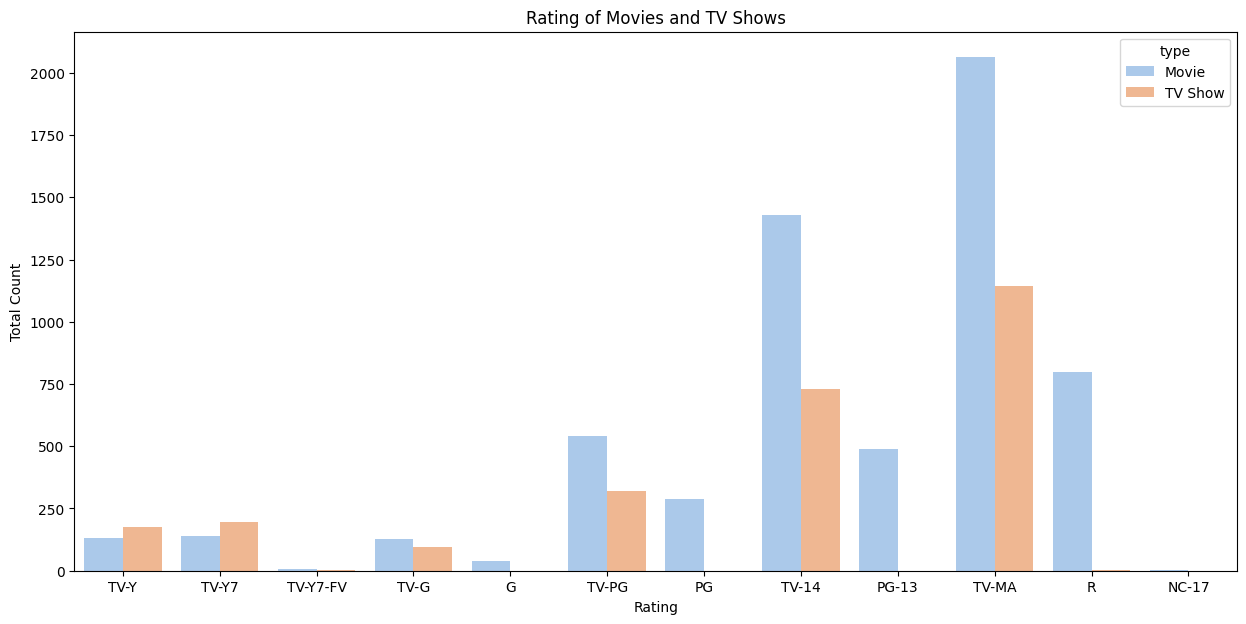

In [79]:
order = ['TV-Y', 'TV-Y7', 'TV-Y7-FV', 'TV-G', 'G', 'TV-PG', 'PG', 'TV-14', 'PG-13', 'TV-MA', 'R', 'NC-17']
plt.figure(figsize=(15, 7))
g = sns.countplot(data=netflix_titles_df, x='rating', hue='type', order=order, palette="pastel")
plt.title('Rating of Movies and TV Shows')
plt.xlabel('Rating')
plt.ylabel('Total Count')
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3880\340940753.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g1 = sns.countplot(netflix_movies_df['rating'], order=order, palette="Set1", ax=ax[0])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3880\340940753.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g2 = sns.countplot(netflix_shows_df['rating'], order=order, palette="Set2", ax=ax[1])


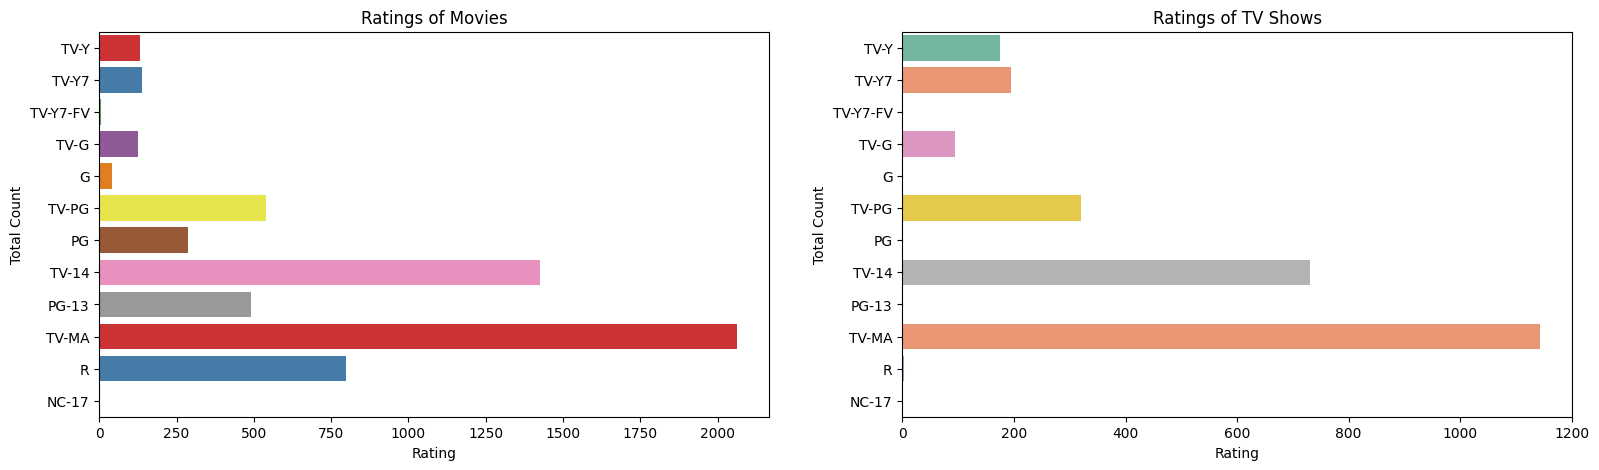

In [80]:
fig, ax = plt.subplots(1, 2, figsize=(19, 5))
g1 = sns.countplot(netflix_movies_df['rating'], order=order, palette="Set1", ax=ax[0])
g1.set_title("Ratings of Movies")
g1.set_xlabel("Rating")
g1.set_ylabel("Total Count")
g2 = sns.countplot(netflix_shows_df['rating'], order=order, palette="Set2", ax=ax[1])
g2.set_title("Ratings of TV Shows")
g2.set_xlabel("Rating")
g2.set_ylabel("Total Count")
plt.show()

In [81]:
netflix_titles_df['year_added'] = pd.DatetimeIndex(netflix_titles_df['date_added']).year
netflix_titles_df['month_added'] = pd.DatetimeIndex(netflix_titles_df['date_added']).month
netflix_movies_df['year_added'] = pd.DatetimeIndex(netflix_movies_df['date_added']).year
netflix_movies_df['month_added'] = pd.DatetimeIndex(netflix_movies_df['date_added']).month
netflix_shows_df['year_added'] = pd.DatetimeIndex(netflix_shows_df['date_added']).year
netflix_shows_df['month_added'] = pd.DatetimeIndex(netflix_shows_df['date_added']).month

In [82]:
netflix_year = netflix_titles_df['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
netflix_year.columns = ['year', 'count']
netflix_year

,year,count
0,2019,2016
1,2020,1879
2,2018,1648
3,2021,1498
4,2017,1186
5,2016,428
6,2015,82
7,2014,24
8,2011,13
9,2013,11


In [83]:
netflix_year2 = netflix_titles_df[['type','year_added']]
movie_year = netflix_year2[netflix_year2['type']=='Movie'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
movie_year.columns = ['year','count']
show_year = netflix_year2[netflix_year2['type']=='TV Show'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
show_year.columns = ['year','count']

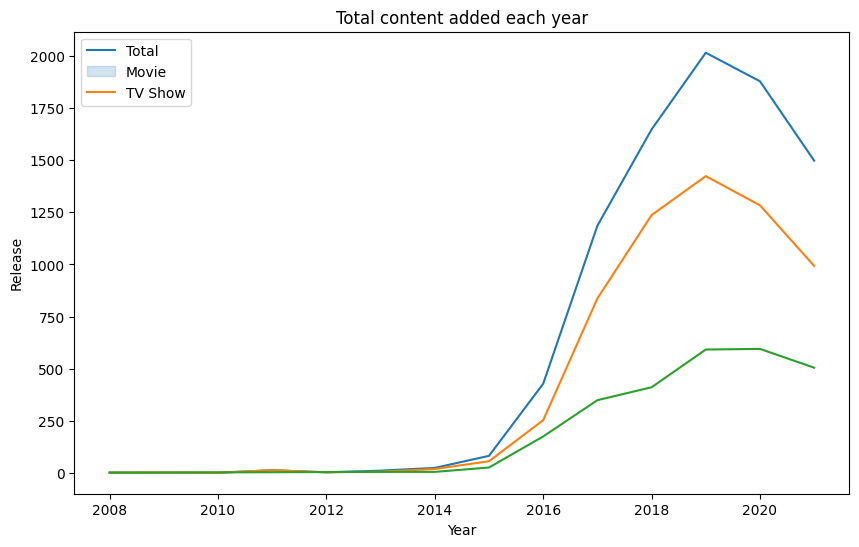

In [84]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=netflix_year, x='year', y='count', ax=ax)
sns.lineplot(data=movie_year, x='year', y='count', ax=ax)
sns.lineplot(data=show_year, x='year', y='count', ax=ax)

plt.title('Total content added each year')
plt.legend(['Total','Movie','TV Show'])
plt.xlabel('Year')
plt.ylabel('Release')
plt.show()

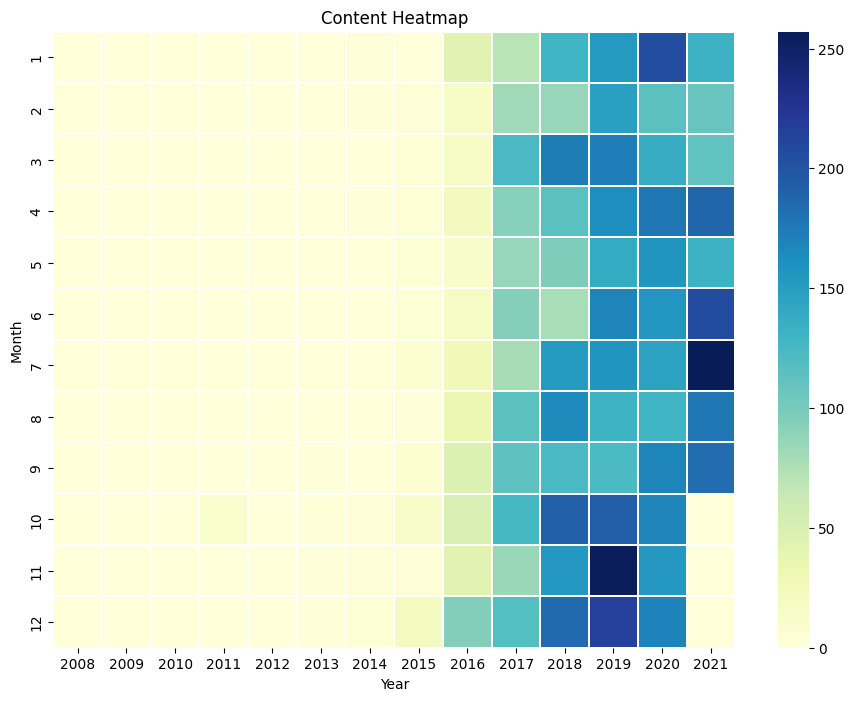

In [85]:
month_year_df = netflix_titles_df.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T

plt.figure(figsize=(11,8))
sns.heatmap(month_year_df, linewidths=0.025, cmap="YlGnBu")
plt.title("Content Heatmap")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3880\3389495918.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


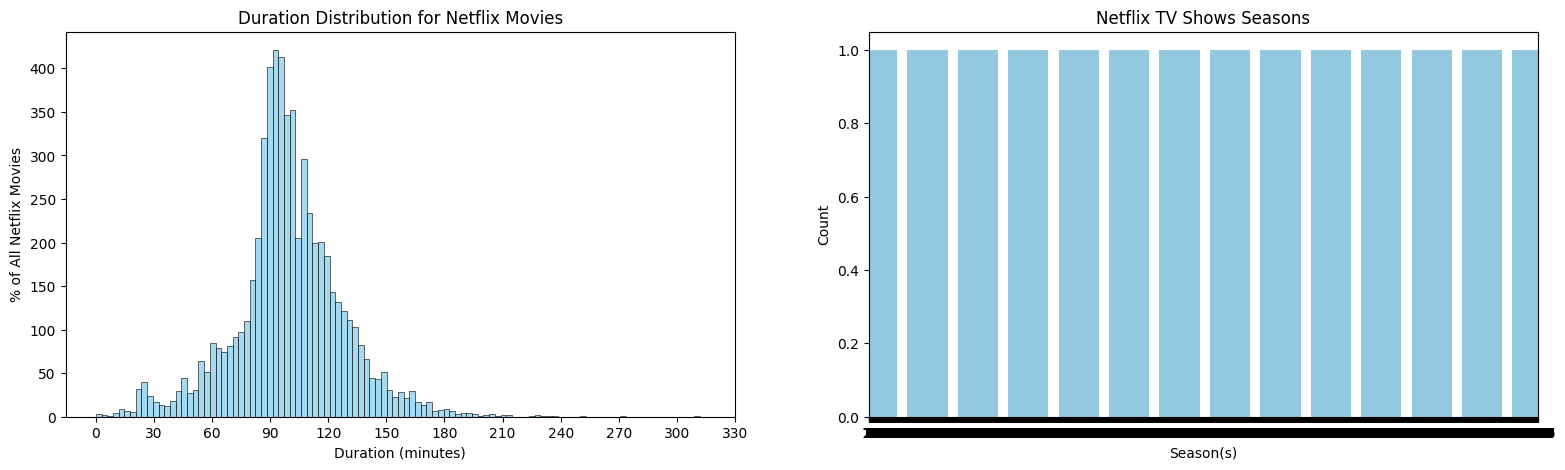

In [86]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.histplot(netflix_movies_df['duration'], color='skyblue',ax=ax[0])
g1.set_xticks(np.arange(0,360,30))
g1.set_title("Duration Distribution for Netflix Movies")
g1.set_ylabel("% of All Netflix Movies")
g1.set_xlabel("Duration (minutes)")
g2 = sns.countplot(netflix_shows_df['seasons'], color='skyblue',ax=ax[1])
g2.set_title("Netflix TV Shows Seasons")
g2.set_ylabel("Count")
g2.set_xlabel("Season(s)")
fig.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3880\3206489060.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(filtered_countries,order = filtered_countries.value_counts().index[:20], palette='pastel')


Text(0.5, 1.0, 'Top 20 Countries on Netflix')

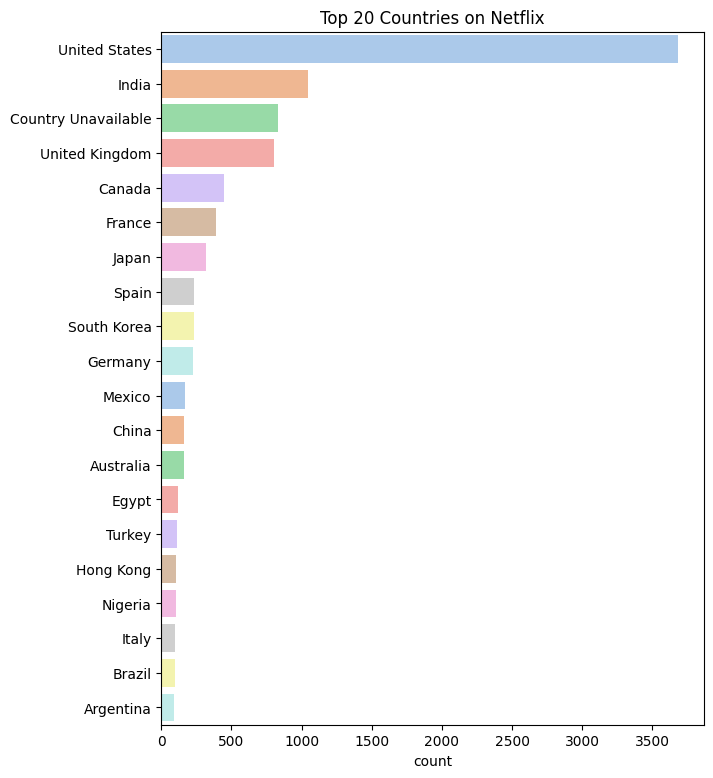

In [87]:
filtered_countries = (netflix_titles_df.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True))
filtered_countries = filtered_countries.reset_index(drop=True)

plt.figure(figsize=(7, 9))
g = sns.countplot(filtered_countries,order = filtered_countries.value_counts().index[:20], palette='pastel') 
plt.title('Top 20 Countries on Netflix')


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3880\843971209.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(filtered_genres, order=filtered_genres.value_counts().index[:20], palette='rainbow')


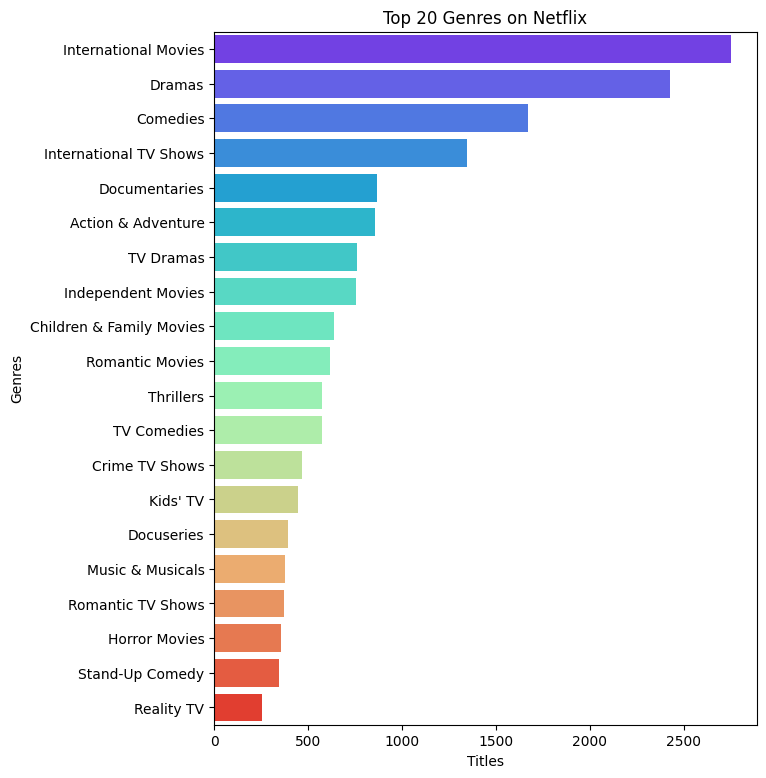

In [88]:
filtered_genres = netflix_titles_df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
filtered_genres = filtered_genres[filtered_genres != 'Genre Unavailable']

filtered_genres = filtered_genres.reset_index(drop=True)

plt.figure(figsize=(7,9))
g = sns.countplot(filtered_genres, order=filtered_genres.value_counts().index[:20], palette='rainbow')
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

top 10 directors?
top 10 acctress?
Timeline? 

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3880\1897823946.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(filtered_directors, order=filtered_directors.value_counts().index[1:21], palette='pastel')


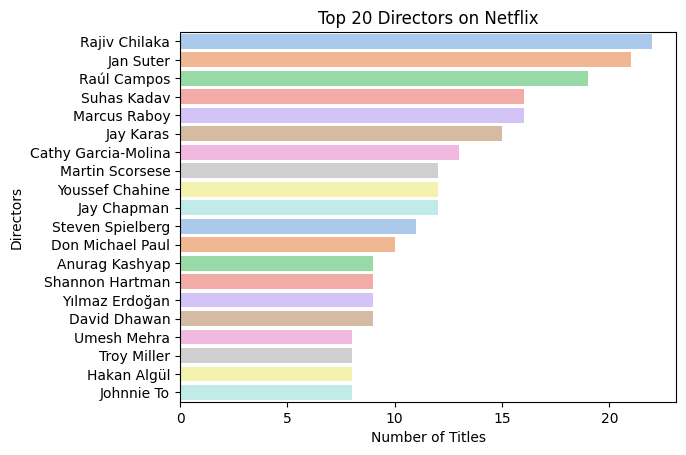

In [ ]:
filtered_directors = netflix_titles_df.director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
filtered_directors = filtered_directors.reset_index(drop=True)

# Try at .index[0:20] then you know why it [1:21]
sns.countplot(filtered_directors, order=filtered_directors.value_counts().index[1:21], palette='pastel')
plt.title('Top 20 Directors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Directors')
plt.show()



C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3880\1733250340.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(filtered_actor, order=filtered_actor.value_counts().index[1:20], palette='rainbow')


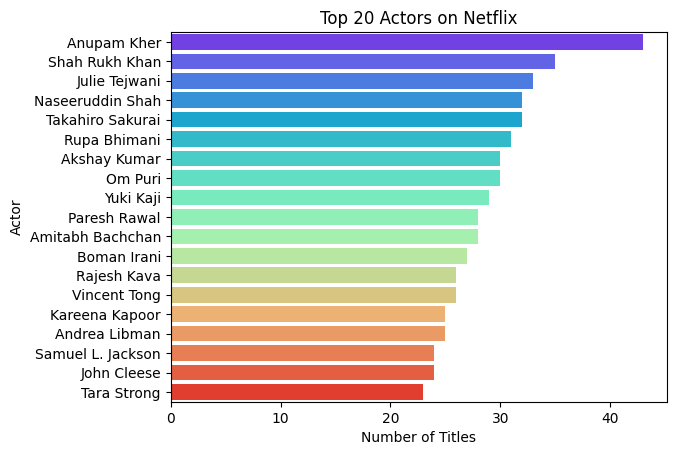

In [90]:
filtered_actor = netflix_titles_df.cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
filtered_actor = filtered_actor.reset_index(drop=True)

sns.countplot(filtered_actor, order=filtered_actor.value_counts().index[1:20], palette='rainbow')
plt.title('Top 20 Actors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Actor')
plt.show()

In [91]:
netflix_titles_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,Country Unavailable,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9


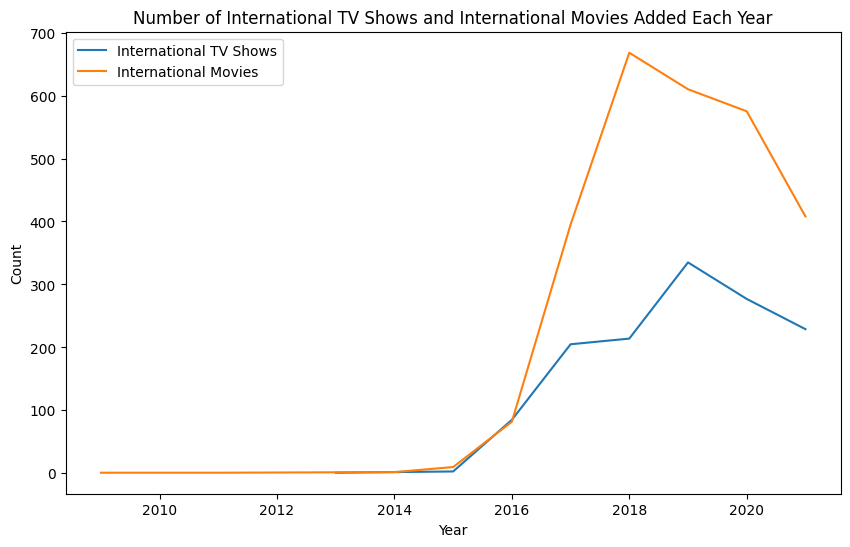

In [96]:
# Filter the data for International TV Shows and International Movies
international_tv_shows = netflix_titles_df[netflix_titles_df['listed_in'].str.contains('International TV Shows')]
international_movies = netflix_titles_df[netflix_titles_df['listed_in'].str.contains('International Movies')]

# Group by year_added and count the number of titles
international_tv_shows_count = international_tv_shows.groupby('year_added').size().reset_index(name='count')
international_movies_count = international_movies.groupby('year_added').size().reset_index(name='count')

# Plot the data
plt.figure(figsize=(10, 6))
sns.lineplot(data=international_tv_shows_count, x='year_added', y='count', label='International TV Shows')
sns.lineplot(data=international_movies_count, x='year_added', y='count', label='International Movies')

plt.title('Number of International TV Shows and International Movies Added Each Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.show()

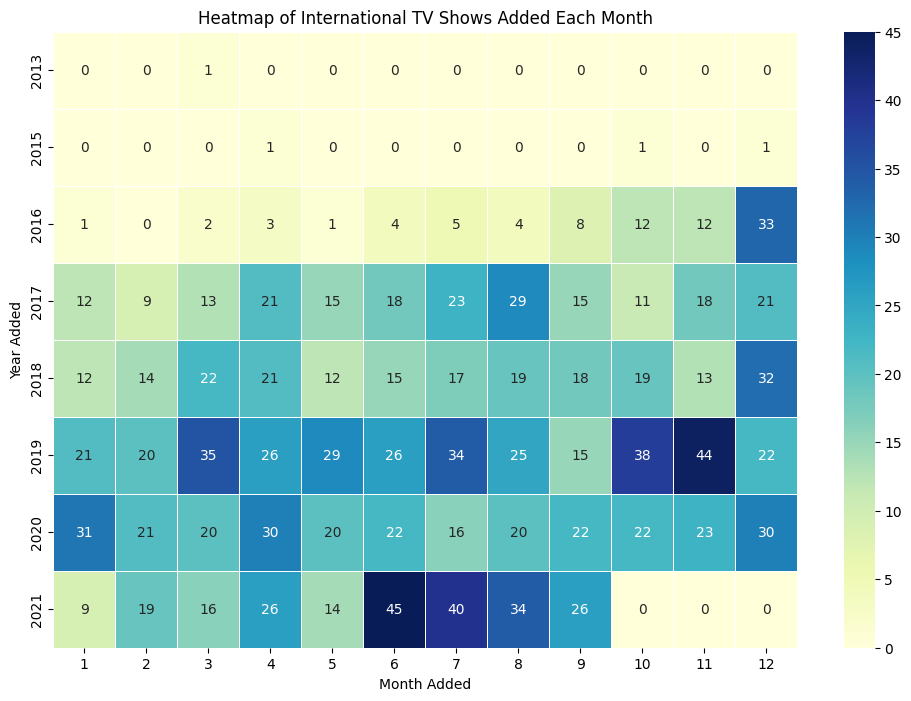

In [98]:
# Group by year_added and month_added and count the number of titles
international_tv_shows_heatmap_data = international_tv_shows.groupby(['year_added', 'month_added']).size().unstack().fillna(0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(international_tv_shows_heatmap_data, cmap="YlGnBu", linewidths=0.5, annot=True, fmt="g")
plt.title('Heatmap of International TV Shows Added Each Month')
plt.xlabel('Month Added')
plt.ylabel('Year Added')
plt.show()

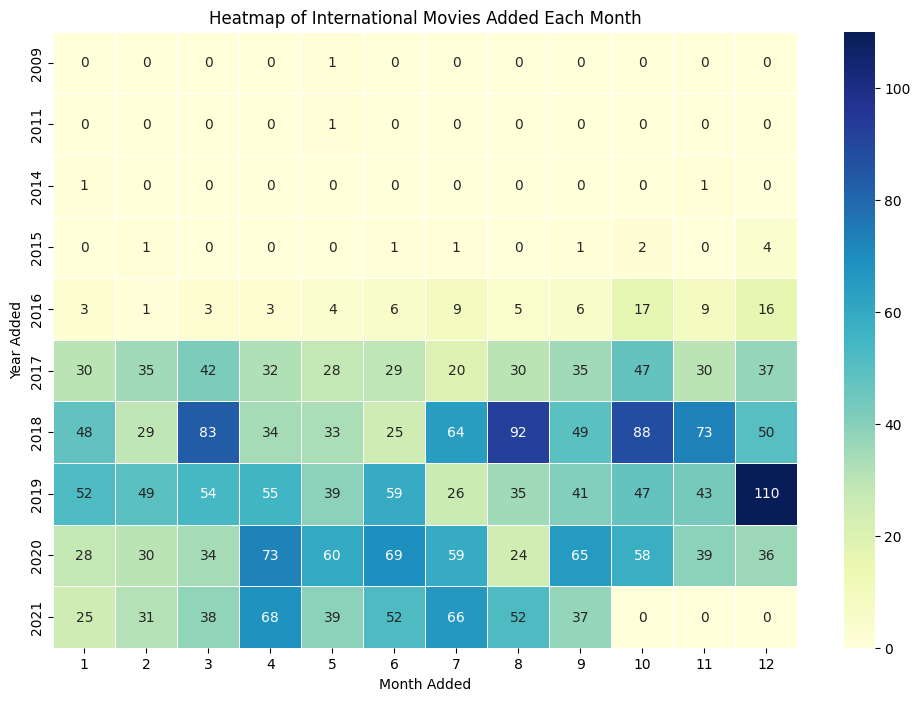

In [99]:
international_movies_heatmap_data = international_movies.groupby(['year_added', 'month_added']).size().unstack().fillna(0)

plt.figure(figsize=(12, 8))
g = sns.heatmap(international_movies_heatmap_data, cmap="YlGnBu", linewidths=0.5, annot=True, fmt="g")
plt.title('Heatmap of International Movies Added Each Month')
plt.xlabel('Month Added')
plt.ylabel('Year Added')
plt.show()